In [2]:
from collections import defaultdict
import random
from random import choices as rc
from random import choice as rancho
import matplotlib.pyplot as plt
from math import sqrt
import networkx as nx
import numpy as np
import csv
from networkx import all_pairs_shortest_path_length
from tqdm import tqdm
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sb
from matplotlib.pyplot import yticks

In [2]:
#2.1 Вычислить функцию:

In [3]:
w = [3, 44, 2]    #Ввод
x = [1, 2, 7]
b = 3

np.dot(w, x) + b

108

In [4]:
#2.2 На отрезке [-5;5] построить графики функций

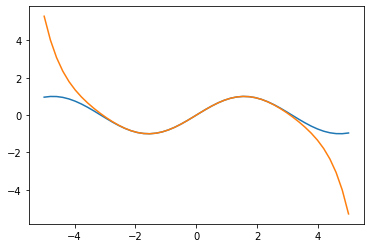

In [5]:
fig, ax = plt.subplots()
x = np.linspace(-5,5,50)
y1 = [np.sin(_x) for _x in x]
y2 = [_x - (_x**3)/6 + (_x**5)/120 - (_x**7)/5040 for _x in x]
ax.plot(x, y1)
ax.plot(x, y2)
pass

In [6]:
#2.3 Нарисовать в matplotlib окружность заданного радиуса r.

12


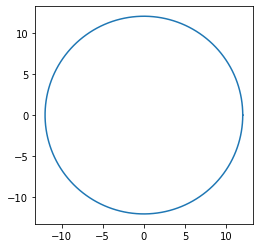

In [7]:
r = float(input())
x = np.linspace(0, 2*np.pi , 150) 
_x = r * np.cos(x) 
y = r * np.sin(x) 
figu, ax = plt.subplots() 
ax.plot( _x, y ) 
ax.set_aspect(1) 

In [8]:
#2.4 Написать функцию transformation_plot, принимающую на вход набор двумерных точек и квадратную матрицу размером 2x2

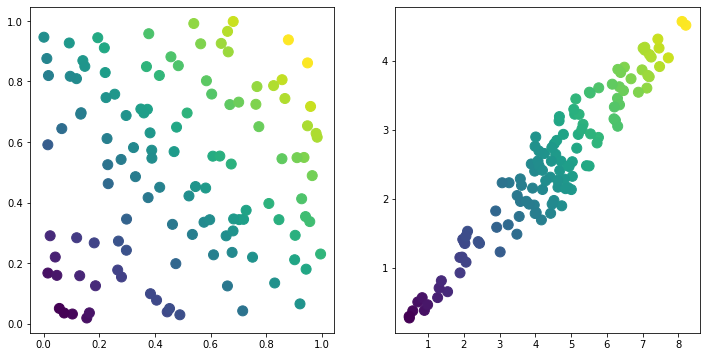

In [9]:
def transformation_plot(points, matrix):
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    x = points[:,0]
    y = points[:,1]
    def ss(x, y):
        return x + y
    c1 = ss(x, y)
    ax[0].scatter(x, y, 100, c=c1)
    after = points.dot(matrix)
    x = after[:,0]
    y = after[:,1]
    ax[1].scatter(x, y, 100, c=c1)
transformation_plot(np.random.random(size=(122, 2)), np.array([[4,3],[5,2]]))

In [10]:
#2.5 Отрисуйте график её производной на выбранном интервале [a,b], не используя её аналитическое выражение

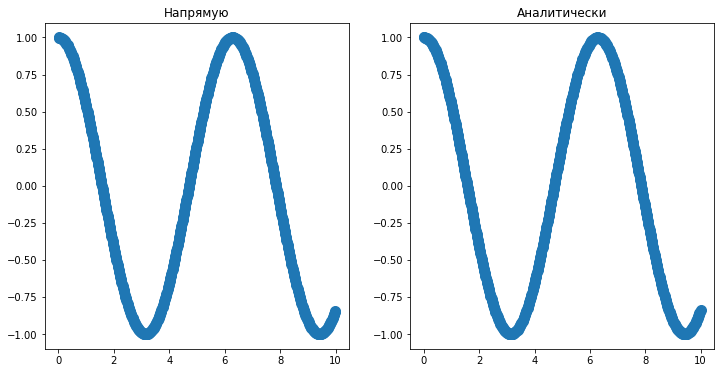

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

x = np.linspace(0, 10, 500)
y = [np.sin(_x) for _x in x]
derx = x[0:-1] - x[1:]
dery = np.array(y[0:-1]) - np.array(y[1:])
ansy = np.divide(dery, derx)
ansx = (x[0:-1] + x[1:])/2
ax[0].scatter(ansx, ansy, 100)
ax[0].set_title('Напрямую')
ax[1].scatter(x, np.cos(x), 100)
ax[1].set_title('Аналитически')
pass


In [12]:
#2.6 Определить пропорцию векторов v в V, для которых угол(v,q) < 90/30 градусов

In [13]:
count = 122
V = np.random.random(size=(count, 2)) - 0.5
q = np.array([2,1])
counter90 = 0
counter30 = 0
for row in V:
    cos = row.dot(q)/(np.linalg.norm(q) * np.linalg.norm(row))
    if np.arccos(cos)*180/np.pi < 90:
        counter90 += 1
    if np.arccos(cos)*180/np.pi < 30:
        counter30 += 1
print('Доля векторов с углом < 90:', counter90/count)
print('Доля векторов с углом < 30:', counter30/count)

Доля векторов с углом < 90: 0.45081967213114754
Доля векторов с углом < 30: 0.13114754098360656


In [14]:
#2.7 Дан гиперкуб и вписанная в него гиперсфера. Через сэмплинг точек внутри гиперкуба, оценить отношение объёма

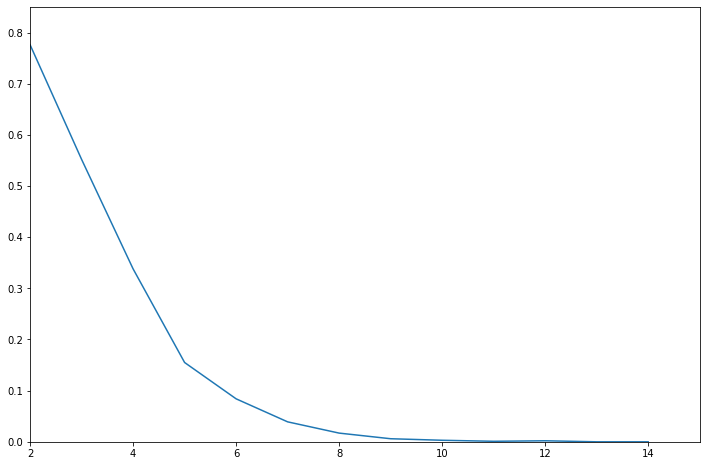

In [15]:
ans = []
for i in range(2, 15):
    incircle = 0
    points = np.random.random(size=(1000, i))
    for point in points:
        if 1 >= sum([x**2 for x in point]):
            incircle += 1
    ans.append(incircle/1000)
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylim(0, 0.85)
ax.set_xlim(2, 15)
ax.plot(range(2, 15), ans, 100)
pass

In [16]:
#2.8  Дана матрица X размером N * d. Напишите функцию, которая преобразует каждую i-й столбец матрицы следующим образом:

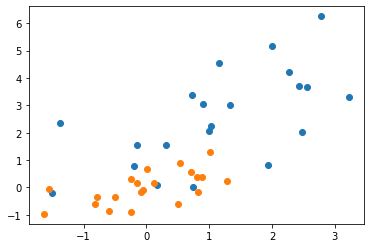

In [17]:
def foo(mat):
    for k in range(mat.shape[1]):
        col = mat[:,k]
        avg = np.mean(col)
        dis = sum((num - avg)**2 for num in col)/len(col)
        for i in range(mat.shape[0]):
            mat[i,k] = (mat[i,k] - avg)/dis
a = np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]])
for i in range(20):
    a = np.vstack([a, np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]])])
fig, ax = plt.subplots()
ax.scatter(a[:,0], a[:,1])
foo(a)
ax.scatter(a[:,0], a[:,1])
pass

In [18]:
#2.9(а) Сгенерировать 100 значений из нормального распределения. Построить гистограмму относительной частоты

Мат. ожидание: -0.085 (Рельное: 0)
Дисперсия: 1.08 (Реальная: 1)


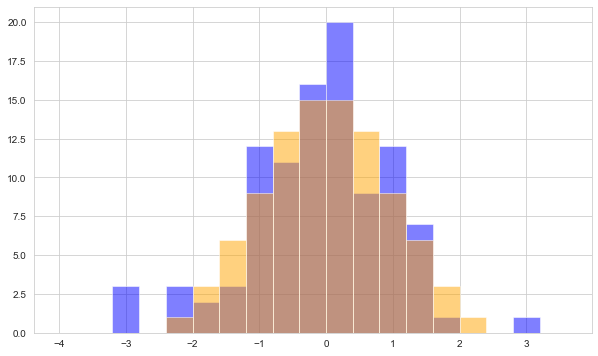

In [285]:
_norm = []
for i in range(100):
    _norm.append(np.random.randn())
fig, ax = plt.subplots(figsize=(10, 6))
y = list(np.random.randn(100))
ax.hist(y, bins=[-4+i*0.4 for i in range(20)], facecolor="blue", alpha=0.5)
_y = []
intervals = [-4+i*0.4 for i in range(20)]
for k in range(len(intervals)-1):
    cdf_upper_limit = norm(loc = 0 , scale = 1).cdf(intervals[k])
    cdf_lower_limit = norm(loc = 0 , scale = 1).cdf(intervals[k+1])
    cou = int((abs(cdf_upper_limit - cdf_lower_limit))*100)
    for i in range(cou):
        _y.append((intervals[k] + intervals[k+1])/2)
mat = round(sum(y)/len(y),3)
print('Мат. ожидание:', mat, '(Рельное: 0)')
print('Дисперсия:', round(sum([(num - mat)**2 for num in y])/len(y), 3), '(Реальная: 1)')
ax.hist(_y, bins=[-4+i*0.4 for i in range(20)], facecolor="orange", alpha=0.5)
pass

In [ ]:
#2.9(б) проведите 100+ экспериментов с генерацией 20 значений из нормального распределения. Оцените дисперсию через:

In [5]:
disp1higher = 0
disp2higher = 0
error1 = 0
error2 = 0
for k in range(100):
    normies = np.random.randn(20)
    avg = sum(normies)/len(normies)
    disp1 = sum((num - avg)**2 for num in normies)/len(normies)
    error1 += abs(1 - disp1)**2
    disp2 = sum((num - avg)**2 for num in normies)/(len(normies)-1)
    error2 += abs(1 - disp2)**2
    if disp1 > 1:
        disp1higher += 1
    if disp2 > 1:
        disp2higher += 1
print('Фрмула с 1/n превысила реальную дисперсию', disp1higher, 'раз, недооценила', 100-disp1higher, 'раз')
print('Средний квадрат ошибки:', round(error1/100,3))
print('Фрмула с 1/(n-1) превысила реальную дисперсию', disp2higher, 'раз, недооценила', 100-disp2higher, 'раз')
print('Средний квадрат ошибки:', round(error2/100,3))

Фрмула с 1/n превысила реальную дисперсию 35 раз, недооценила 65 раз
Средний квадрат ошибки: 0.107
Фрмула с 1/(n-1) превысила реальную дисперсию 45 раз, недооценила 55 раз
Средний квадрат ошибки: 0.115


In [20]:
#3.1 Решить задачу коммивояжера, заданную на полном графе, эвристическими методами

In [373]:
nodes = []
file = open('tsp2.csv', newline='')
reader = csv.reader(file)
for node in reader:
    node = node[0].split(' ')
    node[1],node[2] = int(node[1]), int(node[2])
    nodes.append(node)

    
#Случайный поиск
attended = {'A':1}
current = nodes[0]
length = 0
path = ['A']
while len(attended) != len(nodes):
    next = nodes[(np.random.randint(19)+1)]
    if current is next or next[0] in attended:
        continue
    path.append(next[0])
    length += sqrt((current[1] - next[1])**2 + (current[2] - next[2])**2)
    attended[next[0]] = 1
    current = next
next = nodes[0]
path.append(next[0])
length += sqrt((current[1] - next[1])**2 + (current[2] - next[2])**2)
print('Случайный поиск:', round(length), path)


#Жадный поиск
nodes_copy = nodes[:]
attended = {'A':1}
current = nodes[0]
length = 0
path = []
for i in range(len(nodes)):
    lengths = [sqrt((current[1] - node[1])**2 + (current[2] - node[2])**2) for node in nodes_copy]
    ind = np.argmin(lengths)
    next = nodes_copy.pop(ind)
    path.append(next[0])
    length += lengths[ind]
    attended[next[0]] = 1
    current = next
next = nodes[0]
path.append(next[0])
length += sqrt((current[1] - next[1])**2 + (current[2] - next[2])**2)
print('Жадный поиск:', round(length, 2), path)


#Муравьиный алгоритм
A = 1
B = 8
Q = 40
P = 0.64
edges = {}
for k in range(len(nodes)):
    for i in range(k+1, len(nodes)):
        edges[(nodes[k][0], nodes[i][0])] = 0.2
ans_path = []
ans = 99999999999999999999
for k in range(len(nodes)):
    iteration_paths = []
    for i in range(len(nodes)):
        current = nodes[i]
        local_nodes = nodes[:]
        local_nodes.remove(current)
        local_path = [0,] #Первый элемент - расстояние
        local_path.append(nodes[i])
        for n in range(len(nodes)-1):
            weights = []
            for node in local_nodes:
                if (current[1]-node[1])**2 + (current[2]-node[2])**2==0:
                    weights.append(9999999)
                elif (node[0], current[0]) in edges:
                    weights.append((edges[(node[0], current[0])]**A)*((1/sqrt((current[1] - node[1])**2 + \
                                                                             (current[2] - node[2])**2))**B))
                else:
                    weights.append((edges[(current[0], node[0])]**A)*((1/sqrt((current[1] - node[1])**2 + \
                                                                             (current[2] - node[2])**2))**B))
            next = rc(local_nodes, weights = weights)
            next = next[0]
            local_nodes.remove(next)
            local_path.append(next)
            local_path[0] += sqrt((current[1] - next[1])**2 + (current[2] - next[2])**2)
            current = next
        next = nodes[i]
        local_path.append(next)
        local_path[0] += sqrt((current[1] - next[1])**2 + (current[2] - next[2])**2)
        iteration_paths.append(local_path)
    for loc_path in iteration_paths:
        delta = Q/loc_path[0]
        for i in range(1, len(nodes)-1):
            if (loc_path[i][0], loc_path[i+1][0]) in edges:
                edges[(loc_path[i][0], loc_path[i+1][0])] = edges[(loc_path[i][0], loc_path[i+1][0])]*P + delta
            else:
                edges[(loc_path[i+1][0], loc_path[i][0])] = edges[(loc_path[i+1][0], loc_path[i][0])]*P + delta
        if loc_path[0] < ans:
            ans = loc_path[0]
            ans_path = [node[0] for node in loc_path[1:]]
inda = ans_path.index('A')
ans_path = ans_path[inda:] + ans_path[1:inda+1]
print('Муравьиный:',round(ans, 2), ans_path)

Случайный поиск: 108 ['A', 'I', 'D', 'N', 'J', 'B', 'C', 'T', 'R', 'K', 'L', 'E', 'M', 'H', 'F', 'S', 'O', 'G', 'U', 'P', 'A']
Жадный поиск: 49.65 ['A', 'B', 'P', 'C', 'O', 'M', 'L', 'H', 'I', 'K', 'U', 'T', 'J', 'G', 'F', 'E', 'N', 'D', 'R', 'S', 'A']
Муравьиный: 45.46 ['A', 'S', 'B', 'P', 'R', 'D', 'C', 'O', 'M', 'N', 'E', 'F', 'G', 'H', 'L', 'K', 'I', 'J', 'T', 'U', 'A']


In [22]:
#3.2 Дан граф друзей из соцсети VK

In [375]:
graph =  nx.read_gml("VK.gml")
nodes = defaultdict(int)
graph_edges = list(graph.edges)
for edge in (graph_edges): #Определение кол-ва друзей каждого пользователя
    nodes[edge[0]] += 1
    nodes[edge[1]] += 1
counts = [0] * 7
pairs = list(all_pairs_shortest_path_length(graph))
for pair in pairs:
    for count in pair[1].values():
        if count > 0 and count < 7:
            counts[count-1] += 1
        else: counts[-1] += 1
le = sum(counts)
nodess = sorted(nodes.values(), reverse=True)
print('Число уникальных пользователей:', len(nodes))
print('Среднее число друзей:', round(graph.size()*2/len(nodes),1))
print('Медианное число друзей:', nodess[len(nodess)//2]/2 if len(nodess)%2==1 else \
      (nodess[len(nodess)//2] + nodess[len(nodess)//2-1])/2)
print('Доля пар с L=1:', round(counts[0]/le, 2))
print('Доля пар с L=2:', round(counts[1]/le, 2))
print('Доля пар с L=3:', round(counts[2]/le, 2))
print('Доля пар с L=4:', round(counts[3]/le, 2))
print('Доля пар с L=5:', round(counts[4]/le, 2))
print('Доля пар с L=6:', round(counts[5]/le, 2))
print('Доля пар с L>6 или не сущ.:', round(counts[6]/le, 3), '\n')
print('Топ 15:')
[print(node[0], ': ', node[1], sep='') for node in sorted(nodes.items(), key=lambda node: node[1], reverse=True)[:15]]
pass

Число уникальных пользователей: 3766
Среднее число друзей: 22.0
Медианное число друзей: 15.0
Доля пар с L=1: 0.01
Доля пар с L=2: 0.1
Доля пар с L=3: 0.45
Доля пар с L=4: 0.34
Доля пар с L=5: 0.08
Доля пар с L=6: 0.01
Доля пар с L>6 или не сущ.: 0.004 

Топ 15:
154572605: 351
136435809: 211
34847138: 210
1997236: 178
472893795: 178
270418723: 167
246825563: 155
120109289: 148
83372852: 146
94780691: 140
63962118: 136
94509311: 135
150491520: 135
122784747: 132
41459412: 130


In [24]:
#3.3 Для графа из предыдущей задачи:

In [376]:
_nodes = defaultdict(int)
graph_edges = list(graph.edges)
for edge in (graph_edges): #Определение кол-ва друзей каждого пользователя
    _nodes[edge[0]] += 1
    _nodes[edge[1]] += 1
connected = {key:[con[0] for con in graph_edges if con[1] == key] + [con[1] for con in graph_edges if con[0] == key] \
             for key in list(_nodes.keys())}
#ranks = nx.pagerank(graph)
_sum = 0
attended = defaultdict(int)
current = '7036929'
nodes_keys = list(_nodes.keys())
for i in tqdm(range(10000000)):
    if np.random.random() > 0.85:
        next = rc(nodes_keys)[0]
    else:
        next = rc(connected[current])[0]
    _sum += 1
    attended[next] += 1
    current = next
ranks = {key:attended[key]/_sum for key in attended.keys()}
top_ranks = sorted([(key, ranks[key]) for key in ranks], key = lambda a: a[1], reverse=True)[:100]
degrees = {key:_nodes[key]/(len(graph_edges)*2) for key in _nodes.keys()}
top_degrees = sorted([(key, degrees[key]) for key in degrees], key = lambda a: a[1], reverse=True)[:100]
diff = {key[0]:degrees[key[0]] - ranks[key[0]] for key in top_ranks}
diff_top = sorted([(key, diff[key]) for key in diff.keys()], key = lambda a: a[1], reverse=True)
print('PageRank больше чем степень:')
[print(int(diff[0]), ' diff:', round(diff[1], 5), sep='') for diff in diff_top if diff[1] > 0]
pass

100%|██████████████████████████████████████████████████████████████████| 10000000/10000000 [00:22<00:00, 436812.04it/s]


PageRank больше чем степень:
154572605 diff:0.00087
34847138 diff:0.0007
136435809 diff:0.00064
270418723 diff:0.00059
472893795 diff:0.00054
63962118 diff:0.00051
267387321 diff:0.00049
83372852 diff:0.00048
94509311 diff:0.00048
41459412 diff:0.00046
155215950 diff:0.00046
1997236 diff:0.00045
150491520 diff:0.00045
267156959 diff:0.00045
147406188 diff:0.00043
93960849 diff:0.00042
122784747 diff:0.00042
152206965 diff:0.00041
311943718 diff:0.0004
147743003 diff:0.00039
89917726 diff:0.00039
231047362 diff:0.00038
84534254 diff:0.00038
171562973 diff:0.00037
182392472 diff:0.00037
223445537 diff:0.00036
152365262 diff:0.00036
43691748 diff:0.00036
132192931 diff:0.00035
94780691 diff:0.00035
88827556 diff:0.00035
234187160 diff:0.00035
267527624 diff:0.00035
108448130 diff:0.00035
57495875 diff:0.00034
12393140 diff:0.00034
416043133 diff:0.00034
120109289 diff:0.00033
76945912 diff:0.00033
178654794 diff:0.00033
443834545 diff:0.00033
118359763 diff:0.00032
181647470 diff:0.00032
